In [718]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'


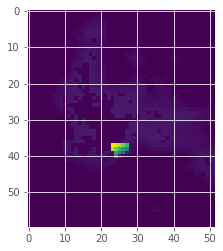

In [719]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
coords = np.array(data.iloc[:,1:3])

#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)
#EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
sensitivity = ps.f5(NLTI,EAM,15)


aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,coords)


aptitude.selectFitnessFunction("max")
f = aptitude.f

X = np.array([37,23])
f(X)

plt.imshow(sensitivity)

In [ ]:
n_sensors = 5

#variable ranges, 2 ranges per sensor position (dim*n_sensors) 
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
print("Search Space Boundaries:", varbound)

dim = len(varbound)

#algorithms_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

model=ga(function=f,
         dimension=dim,
         algorithm_parameters={'max_num_iteration': None, 'population_size': 1000, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None},
         variable_type='int',
         variable_boundaries=varbound)

model.run()

Search Space Boundaries: [[ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]
 [ 0 60]
 [ 0 52]]
|||||||||||||||||||||_____________________________ 42.1% GA is running...

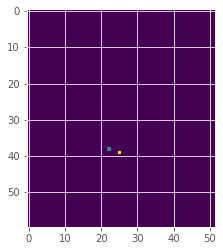

In [721]:
X = model.output_dict["variable"]

plt.imshow(aptitude.showPositions(X))
plt.show()